## Reversible Jump

In [12]:
using Distributions, StatsBase, StatsPlots
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
y = randn(100);

In [3]:
m     = 10_000
beta  = 0.1
K     = zeros(m)
theta = zeros(m,2)
k0    = 1
K[1]  = k0
theta0= rand(Cauchy(),2)
theta[1,:] = theta0

for i = 1:m-1
    b = rand()
    if b<beta
        if K[i] == 1
            u = rand(Cauchy())
            theta0[1] = theta[i,1]
            theta0[2] = u
            # MH
            log_alpha = -0.5*(theta0'*theta0) + 0.5 * theta0[1]^2 - log(pdf(Cauchy(),theta0[2]))
            if log(rand()) < log_alpha
                theta[i+1,:] = theta0
                K[i+1]       = 2
            else
                theta[i+1,1] = theta0[1]
                K[i+1]       = 1
            end
        else
            theta0[1] = theta[i,1]
            u         = theta[i,2]
            #MH
            log_alpha = -0.5*theta0[1]^2 + log(pdf(Cauchy(),u)) + 0.5 * (theta[i,:]' * theta[i,:])
            if log(rand()) < log_alpha
                theta[i+1,1] = theta0[1]
                K[i+1]       = 1
            else
                theta[i+1,:] = theta0
                K[i+1]       = 2
            end
        end
    else
        if K[i] == 1
            theta0[1] = theta[i,1][1] + 0.3 * randn()
            log_alpha = -0.5 * theta0[1]^2 + 0.5 * theta[i,1]^2
            if (log(rand()))< log_alpha
                theta[i+1,:] = theta0
                K[i+1] = K[i]
            else
                theta[i+1,:] = theta[i,:]
                K[i+1] = K[i]
            end
        else
            theta0 = theta[i,:] .+ 0.3 .* randn(2)
            log_alpha = -0.5*(theta0'*theta0) + 0.5 * (theta[i,:]'*theta[i,:])
            if log(rand()) < log_alpha
                theta[i+1,:] = theta0
                K[i+1] = K[i]
            else
                theta[i+1,:] = theta[i,:]
                K[i+1] = K[i]
            end
        end
    end
end

In [4]:
t2 = theta[K.==2,:];
t1 = theta[K.==1,:];
sum(K.==2)/sum(K.==1)

2.4698126301179735

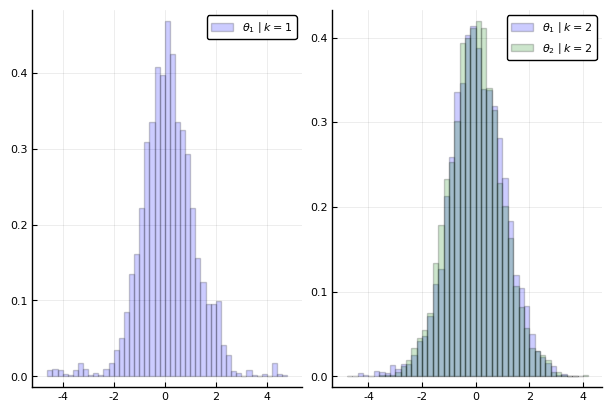

In [25]:
p1 = histogram(t1[:,1],alpha=0.2,normalized=true,color=:blue, label=L"\theta_1 \mid k=1")
# p1 = density!(t1[:,1],color=:blue)
# density!(t1[:,2],color=:green)
# p1 = histogram!(t1[:,2],alpha=0.2,normalized=true,color=:green)

histogram(t2[:,1],alpha=0.2,normalized=true,color=:blue, label=L"\theta_1 \mid k=2")
# density!(t2[:,1],color=:blue)
# density!(t2[:,2],color=:green)
p2 = histogram!(t2[:,2],alpha=0.2,normalized=true,color=:green, label=L"\theta_2 \mid k=2")
p3 = plot(p1,p2,layout=2)
savefig(p3, "./images/Reversible.png")

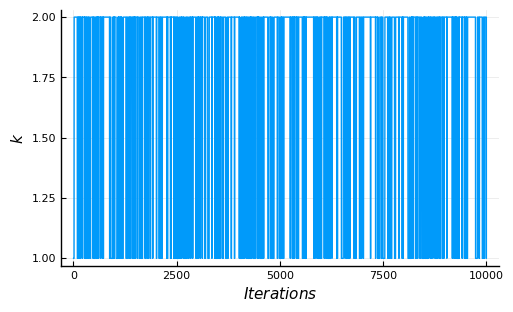

In [31]:
p = plot(K,size=(500,300),legend=false,ylabel=L"k",xlabel=L"Iterations")
savefig(p, "./images/Jumps.png")